In [155]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os
import statsmodels.api as sm


import warnings

In [156]:
warnings.filterwarnings("ignore") # отключает предупреждения

# Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков. Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.

In [157]:
file = '../input/energy/my_PJME_MW.csv'
data = pd.read_csv(file, index_col = [0], parse_dates=[0])
week = data.resample('w').mean()


In [158]:
data_w = week.copy()

data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000


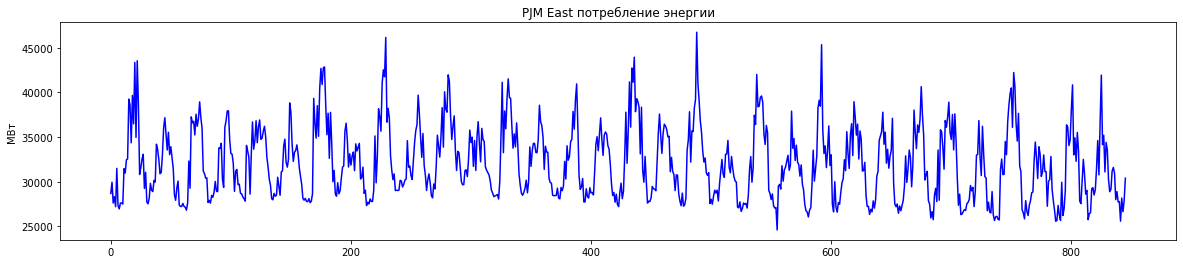

In [159]:
plt.figure(figsize =(20,4))
plt.plot(data_w['PJME_MW'].values[10:-10], 'b' )  #.get_level_values('Date')
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [160]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
import seaborn as sns

scl=StandardScaler()
tsne_ =TSNE(n_components=2)
pca_ =PCA(n_components=2)

X = data_w.iloc[:,:].values

Xscale = scl.fit_transform(X)
X_t = tsne_.fit_transform(Xscale)
X_p = pca_.fit_transform(Xscale)

In [161]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
Xpca=pca.fit_transform(Xscale[:,1:-1])
Xpca.shape

(866, 2)

In [162]:
data_w['pca1']=Xpca[:,0]
data_w['pca2']=Xpca[:,1]
data_w

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday,pca1,pca2
Date,,,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.580420,0.160839,0.000000,0.167832,-3.397014,-11.168072
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.500000,0.000000,0.000000,0.000000,-3.152994,-0.533559
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.500000,0.000000,0.142857,0.000000,-2.796813,-0.460904
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.500000,0.142857,0.000000,0.142857,-2.754047,-0.506661
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.500000,0.000000,0.000000,0.000000,-2.849943,-0.426372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-08,38459.982143,2018.0,7.000000,5.000000,3.0,186.000000,27.0,3.000000,11.500000,0.142857,0.142857,0.142857,0.631933,0.326986
2018-07-15,36420.035714,2018.0,7.000000,12.000000,3.0,193.000000,28.0,3.000000,11.500000,0.000000,0.000000,0.000000,0.288233,0.629746
2018-07-22,35612.095238,2018.0,7.000000,19.000000,3.0,200.000000,29.0,3.000000,11.500000,0.000000,0.000000,0.000000,0.391090,0.730325


In [163]:
first_diff =np.array(data_w.iloc[1:,0].values - data_w.iloc[:-1,0].values).astype('float32') 
data_w['diff1'] = 0.0
data_w['diff1'] =  data_w['diff1'].astype('float') 
data_w['diff1'].values[1:] = first_diff
data_w

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday,pca1,pca2,diff1
Date,,,,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.580420,0.160839,0.000000,0.167832,-3.397014,-11.168072,0.000000
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.500000,0.000000,0.000000,0.000000,-3.152994,-0.533559,-904.773926
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.500000,0.000000,0.142857,0.000000,-2.796813,-0.460904,-34.505951
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.500000,0.142857,0.000000,0.142857,-2.754047,-0.506661,-1311.351196
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.500000,0.000000,0.000000,0.000000,-2.849943,-0.426372,-945.041687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-08,38459.982143,2018.0,7.000000,5.000000,3.0,186.000000,27.0,3.000000,11.500000,0.142857,0.142857,0.142857,0.631933,0.326986,2548.142822
2018-07-15,36420.035714,2018.0,7.000000,12.000000,3.0,193.000000,28.0,3.000000,11.500000,0.000000,0.000000,0.000000,0.288233,0.629746,-2039.946411
2018-07-22,35612.095238,2018.0,7.000000,19.000000,3.0,200.000000,29.0,3.000000,11.500000,0.000000,0.000000,0.000000,0.391090,0.730325,-807.940491


In [164]:
first_diff_d =(first_diff) / data_w.iloc[1:,0].values
data_w['diff1_d'] = 0.0
data_w['diff1_d'] =  data_w['diff1_d'].astype('float') 
data_w['diff1_d'].values[1:] = np.array(first_diff_d).astype('float32')

In [165]:
import scipy.stats as scs
def invboxcox(y,lmbda):
    # обрабтное преобразование Бокса-Кокса
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

In [166]:
first_diff_l =np.log(data_w.iloc[1:,0].values) 
#first_diff_l, lmbda1 = scs.boxcox(data_d.iloc[1:,0].values) # НЕ РАБОТАЕТ , когда АРГУМЕНТ ЛОГАРИФМА БЛИЗОК 0 
data_w['diff1_l'] = 0
data_w['diff1_l'] =  data_w['diff1_l'].astype('float') 
data_w['diff1_l'].values[1:] = first_diff_l

Добавим скользящее среднее по всей модели с глубиной 7 дней. Размер окна определен длиной недельных циклов.

In [167]:
data_w['d_w7']=data_w['PJME_MW'].rolling(window=7).mean()

А теперь добавим еще и экспонентциальную среднюю. Медленную, т.к. интересная информация лежит на уровне сезонных колебаний цены.

In [168]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

data_w['exp_0_05'] = exponential_smoothing(data_w['PJME_MW'], 0.05)


В итоге данные примут вид 

In [169]:
data_w.iloc[10:15,:]


,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday,pca1,pca2,diff1,diff1_d,diff1_l,d_w7,exp_0_05
Date,,,,,,,,,,,,,,,,,,,
2002-03-17,28672.779762,2002.0,3.0,14.000000,1.0,73.000000,11.0,3.000000,11.500000,0.0,0.0,0.0,-2.237561,-0.492720,-768.130981,-0.026790,10.263704,29727.200680,31436.852496
2002-03-24,29927.488095,2002.0,3.0,21.000000,1.0,80.000000,12.0,3.000000,11.500000,0.0,0.0,0.0,-2.134704,-0.392141,1254.708374,0.041925,10.306533,29831.629252,31361.384276
2002-03-31,27595.869048,2002.0,3.0,28.000000,1.0,87.000000,13.0,3.000000,11.500000,0.0,0.0,0.0,-2.031847,-0.291563,-2331.619141,-0.084492,10.225421,29323.822279,31173.108514
2002-04-07,28308.778443,2002.0,4.0,3.982036,2.0,93.982036,14.0,2.982036,11.550898,0.0,0.0,0.0,-1.606015,-3.047063,712.909424,0.025183,10.250927,28994.138417,31029.892011
2002-04-14,27182.482143,2002.0,4.0,11.000000,2.0,101.000000,15.0,3.000000,11.500000,0.0,0.0,0.0,-1.391518,-0.554280,-1126.296265,-0.041435,10.210328,28713.902873,30837.521517


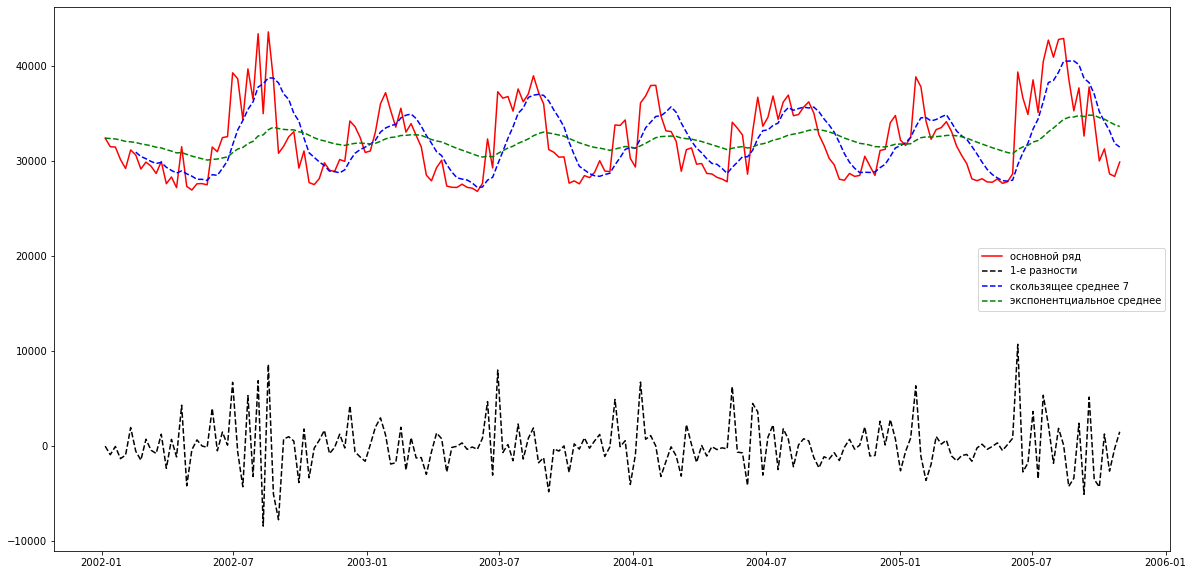

In [170]:
plt.figure(figsize = (20,10))
N100=200
plt.plot(data_w.index[:N100],data_w['PJME_MW'][:N100],'r',label ='основной ряд')
plt.plot(data_w.index[:N100],data_w['diff1'][:N100],'--k',label ='1-е разности')
plt.plot(data_w.index[:N100],data_w['d_w7'][:N100],'--b',label ='скользящее среднее 7')
plt.plot(data_w.index[:N100],data_w['exp_0_05'][:N100],'--g',label ='экспонентциальное среднее')
plt.legend()
plt.show()


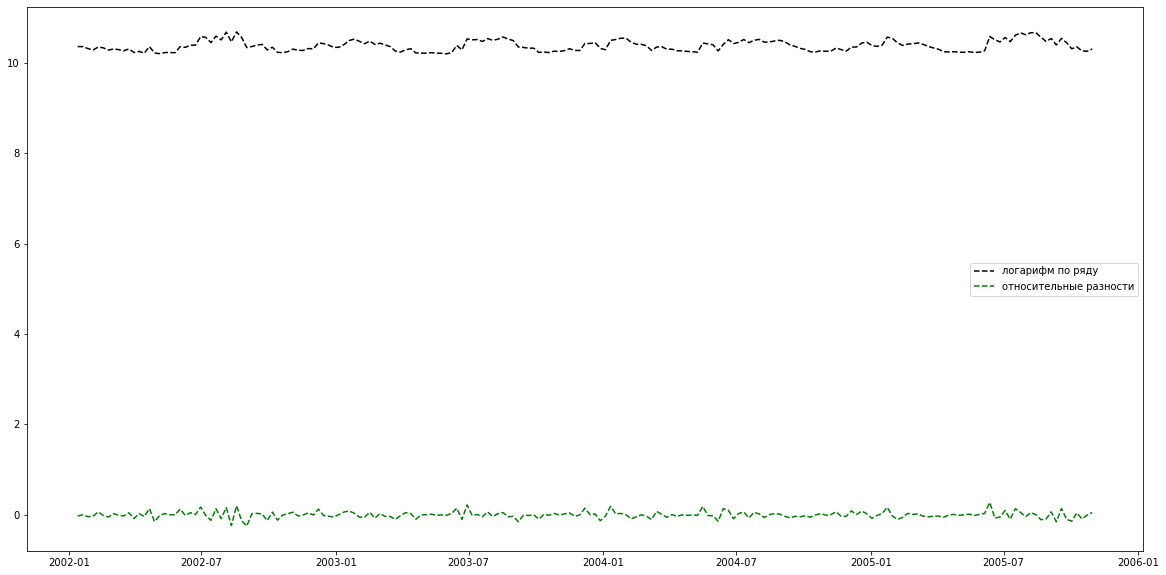

In [171]:
plt.figure(figsize = (20,10))

N100=200
plt.plot(data_w.index[1:N100],data_w['diff1_l'][1:N100],'--k',label ='логарифм по ряду')

plt.plot(data_w.index[1:N100],data_w['diff1_d'][1:N100],'--g',label ='относительные разности')
plt.legend()
plt.show()

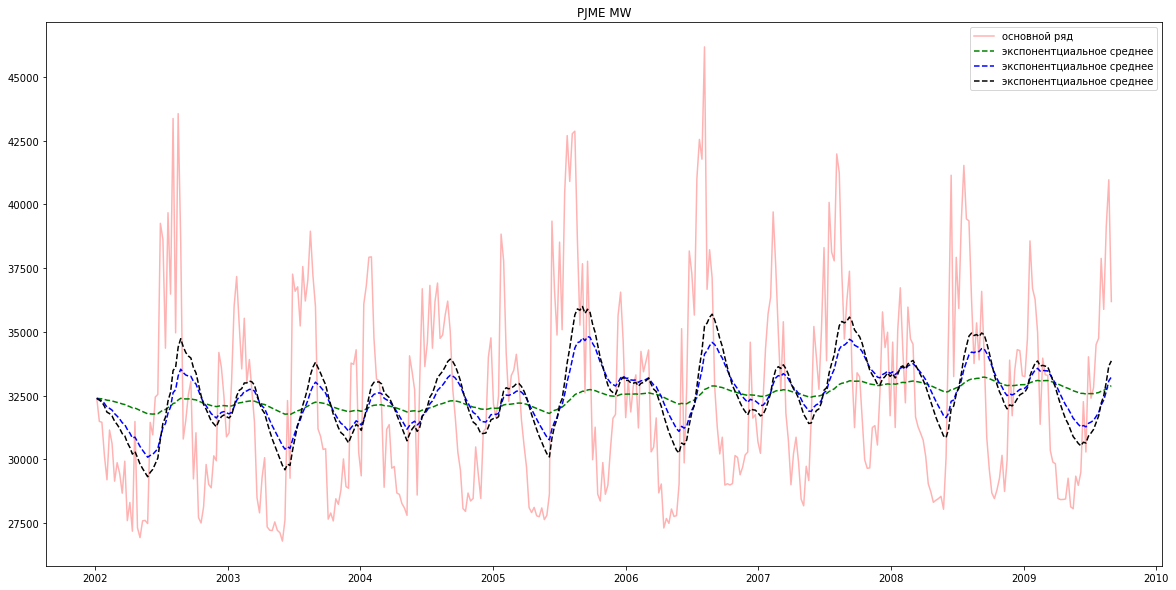

In [172]:
plt.figure(figsize = (20,10))

data_w['exp_0_01'] = exponential_smoothing(data_w['PJME_MW'], 0.01)
data_w['exp_0_03'] = exponential_smoothing(data_w['PJME_MW'], 0.03)
data_w['exp_0_04'] = exponential_smoothing(data_w['PJME_MW'], 0.04)
data_w['exp_0_06'] = exponential_smoothing(data_w['PJME_MW'], 0.06)
data_w['exp_0_07'] = exponential_smoothing(data_w['PJME_MW'], 0.07)
data_w['exp_0_08'] = exponential_smoothing(data_w['PJME_MW'], 0.08)

N100=400
plt.plot(data_w.index[:N100],data_w['PJME_MW'][:N100],'r',label ='основной ряд',alpha=0.3)
plt.plot(data_w.index[:N100],data_w['exp_0_01'][:N100],'--g',label ='экспонентциальное среднее')
plt.plot(data_w.index[:N100],data_w['exp_0_05'][:N100],'--b',label ='экспонентциальное среднее')
plt.plot(data_w.index[:N100],data_w['exp_0_08'][:N100],'--k',label ='экспонентциальное среднее')
plt.legend()
plt.title('PJME MW')
plt.show()

In [173]:
data_w.iloc[:7,14]=0

In [174]:
data_w

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,...,diff1_d,diff1_l,d_w7,exp_0_05,exp_0_01,exp_0_03,exp_0_04,exp_0_06,exp_0_07,exp_0_08
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.580420,0.160839,...,0.000000,0.000000,NaN,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.500000,0.000000,...,-0.028734,10.357342,NaN,32346.922142,32383.113100,32365.017621,32355.969882,32337.874403,32328.826664,32319.778924
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.500000,0.000000,...,-0.001097,10.356246,NaN,32302.220083,32373.810778,32337.653521,32319.846325,32284.774796,32267.510464,32250.427087
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.500000,0.142857,...,-0.043506,10.313659,NaN,32194.185567,32351.487968,32271.769808,32232.713662,32156.180094,32118.691815,32081.715301
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.500000,0.000000,...,-0.032368,10.281804,NaN,32044.300693,32319.937969,32179.511357,32111.264639,31978.598574,31914.137554,31850.897124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-08,38459.982143,2018.0,7.000000,5.000000,3.0,186.000000,27.0,3.000000,11.500000,0.142857,...,0.066254,10.557374,32763.365646,31029.513277,31149.351351,30974.370915,30993.168173,31080.212986,31145.037913,31223.895665
2018-07-15,36420.035714,2018.0,7.000000,12.000000,3.0,193.000000,28.0,3.000000,11.500000,0.000000,...,-0.056012,10.502874,33625.886054,31299.039399,31202.058195,31137.740859,31210.242874,31400.602350,31514.287759,31639.586869
2018-07-22,35612.095238,2018.0,7.000000,19.000000,3.0,200.000000,29.0,3.000000,11.500000,0.000000,...,-0.022687,10.480441,34292.528061,31514.692191,31246.158565,31271.971490,31386.316969,31653.291923,31801.134283,31957.387539


Добавим истории длиной p в признаках автокорреляции

In [175]:
p = 14
for i in range(p):
    data_w['t'+str(p-i)]=0
    data_w['t'+str(p-i)].values[p:] = data_w['PJME_MW'].values[i:-(p)+i]

Аналогично добавляем первые разности на глубину p

In [176]:
p = 14
for i in range(p):
    data_w['d'+str(p-i)]=0
    data_w['d'+str(p-i)].values[p:] = data_w['diff1'].values[i:-(p)+i]

Итоговая система признаков

In [177]:
data_w.head(20)

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,...,d10,d9,d8,d7,d6,d5,d4,d3,d2,d1
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.580420,0.160839,...,0,0,0,0,0,0,0,0,0,0
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.500000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.500000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.500000,0.142857,...,0,0,0,0,0,0,0,0,0,0
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.500000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2002-02-10,31150.517857,2002.0,2.000000,7.000000,1.0,38.000000,6.0,3.000000,11.500000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2002-02-17,30616.565476,2002.0,2.000000,14.000000,1.0,45.000000,7.0,3.000000,11.500000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2002-02-24,29144.130952,2002.0,2.000000,21.000000,1.0,52.000000,8.0,3.000000,11.500000,0.142857,...,0,0,0,0,0,0,0,0,0,0
2002-03-03,29869.011905,2002.0,2.428571,16.000000,1.0,59.000000,9.0,3.000000,11.500000,0.000000,...,0,0,0,0,0,0,0,0,0,0


## Думаю, что единая функция для всего задания - не самая лучшая реализация, но, как мне кажется, удобна для проверки.

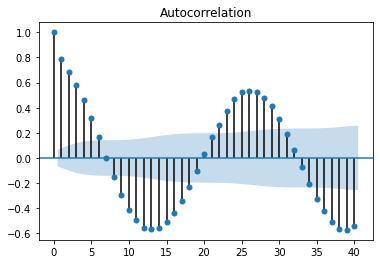

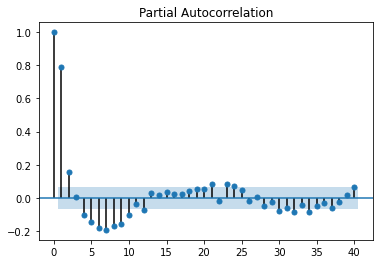

In [178]:
sm.graphics.tsa.plot_acf(week['PJME_MW'].values, lags=40)
plt.show()
#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(week['PJME_MW'].values, lags=40)
plt.show()

In [179]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# сделаем функцию
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()


def test_train(data_w,h):
    scl_target=StandardScaler()

    target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
    y = scl_target.fit_transform(target)

    scl_x=StandardScaler() 
    X = data_w.iloc[p:-h,:].values
    X = scl_x.fit_transform(X.astype('float64'))
    X[:7,14]=0



    f_test, _ = f_regression(X, y.ravel())
    f_test /= np.max(f_test)
#     for i in range(X.shape[1]):
#         print("F-test={:.2f},  I={}".format(f_test[i],i))
        
    sfk =SelectKBest(f_regression, k=7)
    X_new1 =sfk.fit_transform(X, y.ravel())
    column_names = data_w.columns[sfk.get_support()]
    
    sfp=SelectPercentile(f_regression, percentile=20)
    X_new2 = sfp.fit_transform(X, y.ravel())
    
    column_namesp = data_w.columns[sfp.get_support()]
    gr_model = GradientBoostingRegressor(max_depth=5, n_estimators=10).fit(X, y.ravel())


    sfm = SelectFromModel(gr_model,  max_features = 5)

    sfm.fit(X, y.ravel())
    X_new3 = sfm.transform(X)
    
    list_param_k =np.where(sfk.get_support())[0]
    list_param_p =np.where(sfp.get_support())[0]
    list_param_m =np.where(sfm.get_support())[0]

    print('Номера признаков k лучших признаков : ',list_param_k)
    print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
    print('Номера признаков для выбора по модели : ',list_param_m)
    list_par=[0,15,16, 25, 26, 27, 28, 29,30, 31, 36, 37,38]
    X_new = X[:,list_par]
    data_w.columns[list_par]
    train, test = split_data( data_w.iloc[:-1,:], '01-06-2016')


    plt.figure( figsize=( 20, 10 ))
    plt.xlabel('Время')
    plt.ylabel('Потребление энергии, МВт')
    plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
    plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
    plt.title( 'Тестовые и тренировочные данные' )
    plt.legend()
    plt.show()
    
    
    X_train =X_new[:train.shape[0],:]
    y_train =y[:train.shape[0],0]
    X_test =X_new[train.shape[0]:-1,:]
    y_test =y[train.shape[0]:-1,0]
    
    model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)
    model_g.fit( X_train, y_train )
    y_test_pred_g = model_g.predict(X_test)
    plt.figure( figsize=( 15, 7 ))


    plt.xlabel('Время')
    plt.ylabel('Потребление энергии, МВт')
    plt.plot(test.index[h+p:],y_test_pred_g, label='predict GB data' )
    plt.plot(test.index[h+p:],y_test, label='test data')

    plt.legend()
    plt.show()
    return X_test,y_test, model_g, scl_target, scl_x,test,y_test_pred_g
    
   

    

In [180]:
 def autorecursion(X_test_100, y_test_100, model_g, scl_target, scl_x,test,y_test_pred_g):
    # ['PJME_MW', 'dayofweek', 'pca2', 'd_w7', 'diff1_l', 'exp_0_07','exp_0_08', 't6', 't1']
    #['PJME_MW', 'dayofweek', 'pca2', 'd_w7', 'diff1_l', 'exp_0_07', 'exp_0_08']
    # 12/06
    # ['PJME_MW', 'dayofweek', 'pca2', 'd_w7', 'diff1_l', 'exp_0_07','exp_0_08', 't13', 't6', 't1'] 
    # 5/11
    #['PJME_MW', 'dayofweek', 'pca2', 'd_w7', 'diff1_l', 'exp_0_05','exp_0_06', 'exp_0_07', 'exp_0_08', 't6', 't1']
    N10 = 58
    for ip in range(N10):
        i = ip+p
        y_test_100[i] = model_g.predict(X_test_100[i,:].reshape((1,X_test_100.shape[1])))
        # восстанавливаем не масштабированное значение ряда текущей точке  
        y_i=scl_target.inverse_transform(y_test_100[i:i+1]  )

        # заполняем вектор для прогноза следующей точки
        X_test_100[i+1,0] = (y_i-scl_x.mean_[0])/scl_x.scale_[0]
        X_test_100[i+1,1] = X_test_100[i-53+1,0]
        X_test_100[i+1,2] = X_test_100[i-52+1,0]
        X_test_100[i+1,3] = X_test_100[i-51+1,0]
        X_test_100[i+1,4] = X_test_100[i-50+1,0]
        X_test_100[i+1,5] = X_test_100[i-49+1,0]
        X_test_100[i+1,6] = X_test_100[i-38+1,0]
        X_test_100[i+1,7] = X_test_100[i-56+1,0]
        X_test_100[i+1,8] = X_test_100[i-1+1,0]



    plt.figure( figsize=( 15, 7 ))


    plt.xlabel('Время')
    plt.ylabel('Потребление энергии, МВт')
    plt.plot(test.index[1:N10+1],y_test_pred_g[:N10], 'r',label='predict GB data' )
    plt.plot(test.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')
    plt.plot(test.index[1:N10+1],y_test[:N10], 'g',label='test data', alpha=0.5)
    plt.legend()
    plt.show()
    er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[p:N10]),y_pred = scl_target.inverse_transform( y_test_100[p:N10]))
#     print('ошибка градиентного бустинга MAPE :  ', er_g,'%')
    er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
    er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
    er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)
    return data_w.iloc[np.where(data_w['year'])].iloc[:10, :], er_s, er_a, er_r2

## Применим модель для 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.

Номера признаков k лучших признаков :  [ 0 16 26 27 28 37 38]
Номера признаков лучших признаков по процентной форме:  [ 0 16 17 25 26 27 28 29 36 37 38]
Номера признаков для выбора по модели :  [ 0 16 27 30 31]


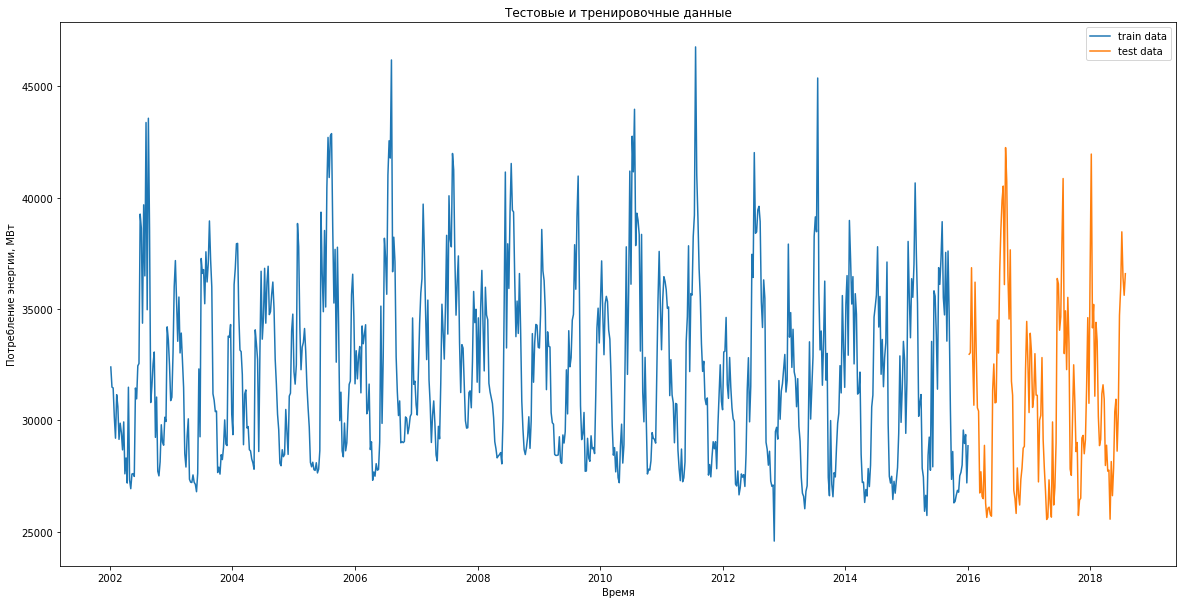

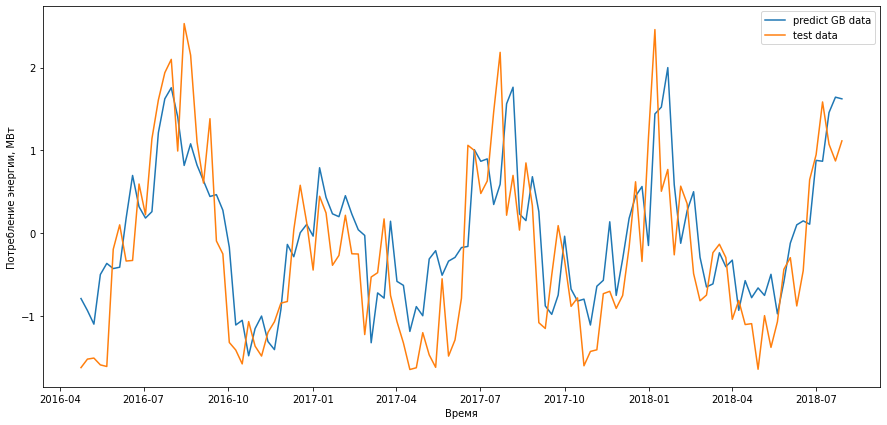

In [188]:
X_test,y_test, model_g, scl_target,scl_x,test,y_test_pred_g = test_train(data_w,1)

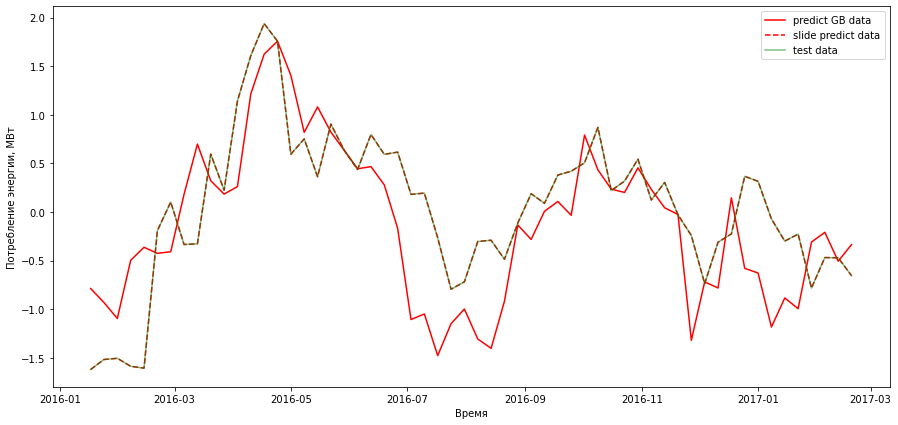


ошибка mse :   0.3935544626938796 
ошибка mae  :   0.49618802234321563 
оценка R2 :   0.4327706712118886


In [189]:
data,er_s, er_a,er_r2 = autorecursion(X_test,y_test, model_g, scl_target, scl_x,test,y_test_pred_g)
print('\nошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

## Применим модель для 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.


Номера признаков k лучших признаков :  [ 0 16 28 29 30 31 32]
Номера признаков лучших признаков по процентной форме:  [ 0 16 26 27 28 29 30 31 32 33 38]
Номера признаков для выбора по модели :  [ 5 12 29 30 31]


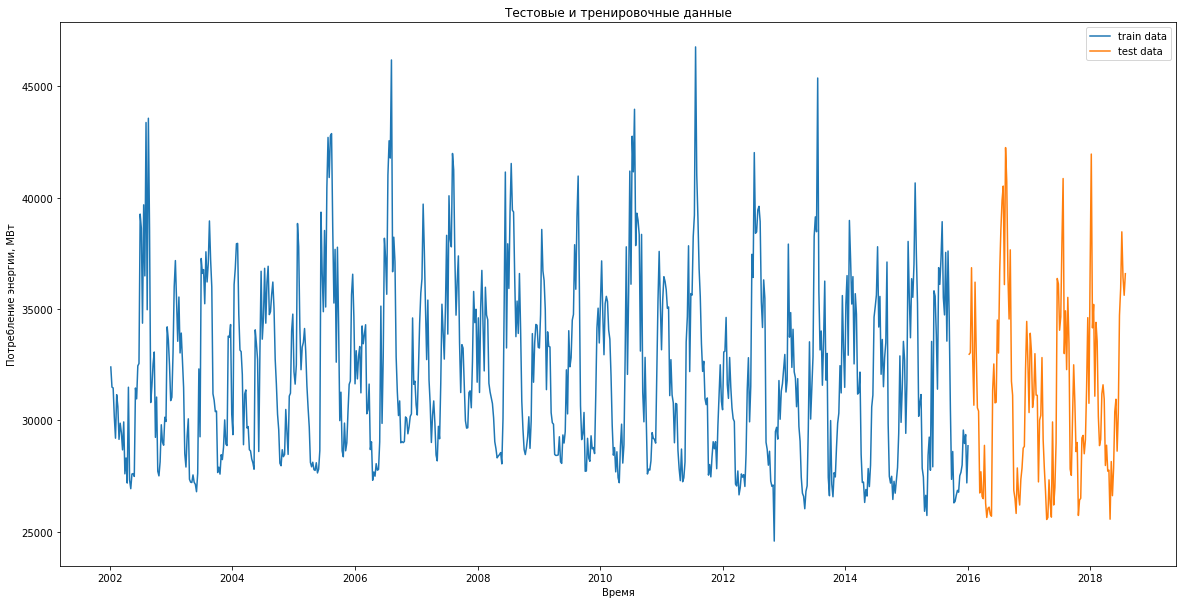

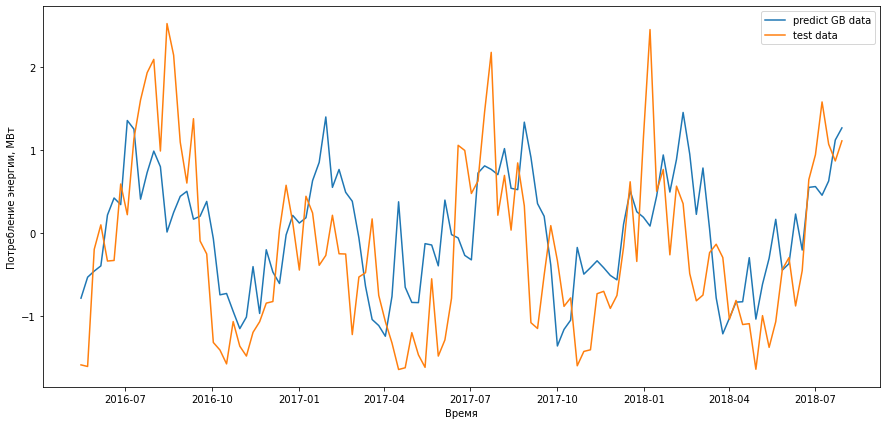

In [183]:
X_test,y_test, model_g, scl_target,scl_x,test,y_test_pred_g = test_train(data_w,4)

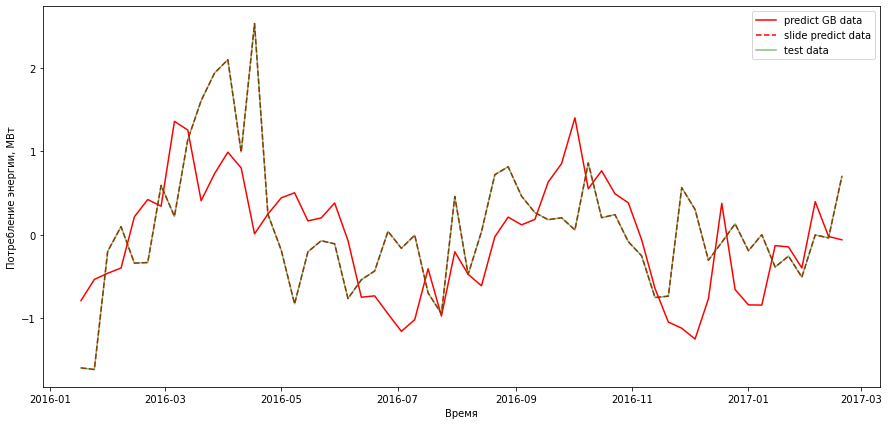


ошибка mse :   0.6038829707395281 
ошибка mae  :   0.6011403089501502 
оценка R2 :   0.1397945960202801


In [184]:
data,er_s, er_a,er_r2 = autorecursion(X_test,y_test, model_g, scl_target, scl_x,test,y_test_pred_g)
print('\nошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

Видимо надо поиграть с настройками, так как результат в 4точке не очень удовлетворительный.

In [208]:
 def autorecursion_p(X_test_100, y_test_100, model_g, scl_target, scl_x,test,y_test_pred_g,N10, p):
    # ['PJME_MW', 'dayofweek', 'pca2', 'd_w7', 'diff1_l', 'exp_0_07','exp_0_08', 't6', 't1']
    #['PJME_MW', 'dayofweek', 'pca2', 'd_w7', 'diff1_l', 'exp_0_07', 'exp_0_08']
    # 12/06
    # ['PJME_MW', 'dayofweek', 'pca2', 'd_w7', 'diff1_l', 'exp_0_07','exp_0_08', 't13', 't6', 't1'] 
    # 5/11
    #['PJME_MW', 'dayofweek', 'pca2', 'd_w7', 'diff1_l', 'exp_0_05','exp_0_06', 'exp_0_07', 'exp_0_08', 't6', 't1']
    for _p in range(p):
        for ip in range(N10):
            i = ip+_p
            y_test_100[i] = model_g.predict(X_test_100[i,:].reshape((1,X_test_100.shape[1])))
            # восстанавливаем не масштабированное значение ряда текущей точке  
            y_i=scl_target.inverse_transform(y_test_100[i:i+1]  )

            # заполняем вектор для прогноза следующей точки
            X_test_100[i+1,0] = (y_i-scl_x.mean_[0])/scl_x.scale_[0]
            X_test_100[i+1,1] = X_test_100[i-53+1,0]
            X_test_100[i+1,2] = X_test_100[i-52+1,0]
            X_test_100[i+1,3] = X_test_100[i-51+1,0]
            X_test_100[i+1,4] = X_test_100[i-50+1,0]
            X_test_100[i+1,5] = X_test_100[i-49+1,0]
            X_test_100[i+1,6] = X_test_100[i-38+1,0]
            X_test_100[i+1,7] = X_test_100[i-56+1,0]
            X_test_100[i+1,8] = X_test_100[i-1+1,0]



#             plt.figure( figsize=( 15, 7 ))


#             plt.xlabel('Время')
#             plt.ylabel('Потребление энергии, МВт')
#             plt.plot(test.index[1:N10+1],y_test_pred_g[:N10], 'r',label='predict GB data' )
#             plt.plot(test.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')
#             plt.plot(test.index[1:N10+1],y_test[:N10], 'g',label='test data', alpha=0.5)
#             plt.legend()
#             plt.show()
        er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[p:N10]),y_pred = scl_target.inverse_transform( y_test_100[p:N10]))
        #     print('ошибка градиентного бустинга MAPE :  ', er_g,'%')
        er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
        er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
        er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)
        print(f'MSE = {er_s}, MAR = {er_a}, R2 = {er_r2}, p = {_p}')

### Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до p-й, от p-й до 2p-й, от 2p-й до 3p-й, .. .pi-й до (i+1)p -й,... ,от 9p до 10*p-й точках (используйте осреденение точек, p - глубина истории, которую видим (в примере самая дальняя точка p=6))

Номера признаков k лучших признаков :  [ 0 16 26 27 28 37 38]
Номера признаков лучших признаков по процентной форме:  [ 0 16 17 25 26 27 28 29 36 37 38]
Номера признаков для выбора по модели :  [ 0 16 27 30 31]


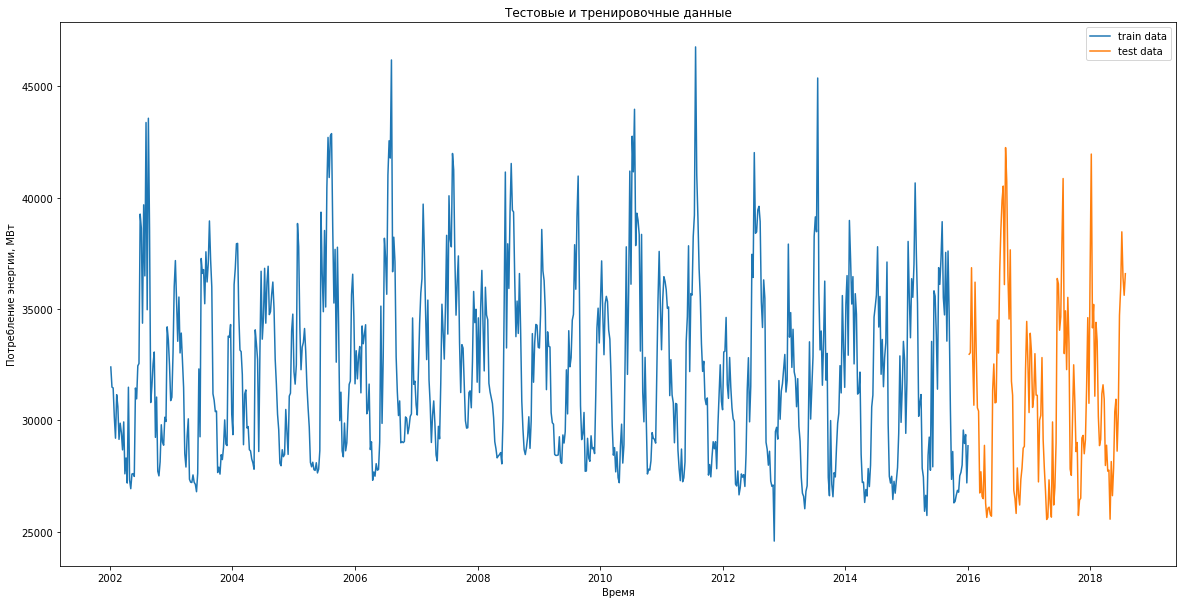

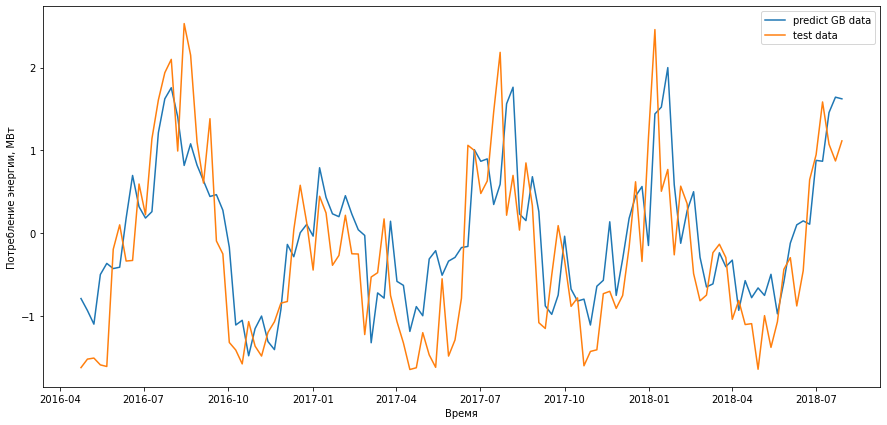

MSE = 0.44192781745320586, MAR = 0.5306914110105219, R2 = 0.24393995853332273, p = 0
MSE = 0.43388716135097505, MAR = 0.5239062911373074, R2 = 0.24036004245459586, p = 1
MSE = 0.4308130798459821, MAR = 0.5195053354392885, R2 = 0.23921636808177138, p = 2
MSE = 0.41835333679019976, MAR = 0.5099135877580392, R2 = 0.24871892395997086, p = 3
MSE = 0.43053675378031564, MAR = 0.5199565536896401, R2 = 0.21459552436147056, p = 4
MSE = 0.4401998675517183, MAR = 0.5262759009943899, R2 = 0.19431878517734913, p = 5
MSE = 0.442196415851221, MAR = 0.5287033605593933, R2 = 0.18684203441527725, p = 6
MSE = 0.4316974202987795, MAR = 0.5196347335868768, R2 = 0.17947195539933591, p = 7
MSE = 0.41186441093759935, MAR = 0.509764613608535, R2 = 0.14946366401544442, p = 8
MSE = 0.4059107958518874, MAR = 0.5072782466809165, R2 = 0.16548077237778558, p = 9
MSE = 0.3965865417850462, MAR = 0.4996067033080015, R2 = 0.2148288342714515, p = 10
MSE = 0.39710931088200185, MAR = 0.5006285090975129, R2 = 0.2184712459071

In [217]:
X_test,y_test, model_g, scl_target,scl_x,test,y_test_pred_g = test_train(data_w,1)
autorecursion_p(X_test,y_test, model_g, scl_target, scl_x,test,y_test_pred_g,58, 50)

## Чем больше интервал, тем меньше модель угадывает данные на тесте.

## Задание


1. Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.

2. Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .
3. Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.
4. Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек. 
5. Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до p-й, от p-й до 2*p-й, от 2*p-й до 3*p-й, .. .p*i-й до (i+1)*p -й,... ,от 9*p до 10*p-й точках (используйте осреденение точек, p - глубина истории, которую видим (в примере самая дальняя точка p=6))

6. Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда.
